In [3]:
import torch
import torch.nn as nn
from torch.distributions import Categorical
import gym
import tqdm
import numpy as np
import matplotlib.pyplot as plt

/Users/khela/miniconda3/envs/dqn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
env = gym.make('LunarLander-v2')
obs_space = env.observation_space.shape[0]
act_space = env.action_space.n

In [8]:
MAX_STEPS = 1000
EPSILON_EXP = 0.99
EPSILON_LIN = 0.01

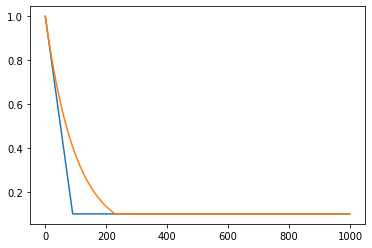

In [9]:
exp_epsilons = [max(0.1, 1 * EPSILON_EXP**i) for i in range(MAX_STEPS)]
lin_epsilons = [max(0.1, 1 - EPSILON_LIN * i) for i in range(MAX_STEPS)]
    
plt.plot(lin_epsilons)
plt.plot(exp_epsilons)

In [10]:
class DQN(nn.Module):
    def __init__(self, obs_space, act_space, ):
        super(DQN, self).__init__()
        self.obs_space = obs_space
        self.act_space = act_space
        
        self.backbone = nn.Sequential(
            nn.Linear(self.obs_space, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, self.act_space),
        )

    def forward(self, x):
        x = torch.from_numpy(x).to()
        logits = self.backbone(x)
        return logits
    
    def get_action(self, obs, epsilon):
        if False:
            return np.random.randint(self.act_space)
        else:
            logits = self.forward(obs)
            dist = Categorical(logits=logits)
            return dist.sample()
            
            

In [13]:
class DQN(nn.Module):
    def __init__(self, obs_space, act_space, device):
        super(DQN, self).__init__()
        self.obs_space = obs_space
        self.act_space = act_space
        self.device = device
        
        self.backbone = nn.Sequential(
            nn.Linear(self.obs_space, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, self.act_space),
        ).to(self.device)

    def forward(self, x):
        x = torch.from_numpy(x).to(self.device)
        logits = self.backbone(x)
        return logits
    
    def get_action(self, obs, epsilon):
        if False:
            return np.random.randint(self.act_space)
        else:
            logits = self.forward(obs)
            dist = Categorical(logits=logits)
            return dist.sample()
            
            

In [16]:
dqn = DQN(obs_space, act_space, device)

In [15]:
obs = env.reset()
done = False
reward = 0
for step in range(MAX_STEPS):
    action = dqn.get_action(obs, exp_epsilons[step])
    obs, reward, done, _ = env.step(action.item())
    print(step, action.item())
    if done:
        obs = env.reset()
        done = False
        reward = 0
        

0 3
1 1
2 0
3 3
4 0
5 1
6 0
7 2
8 1
9 1
10 3
11 2
12 2
13 2
14 3
15 0
16 2
17 1
18 0
19 1
20 2
21 2
22 2
23 3
24 3
25 0
26 0
27 2
28 1
29 3
30 2
31 0
32 2
33 2
34 2
35 3
36 1
37 1
38 0
39 2
40 1
41 3
42 3
43 0
44 0
45 2
46 1
47 1
48 0
49 2
50 0
51 2
52 3
53 0
54 0
55 2
56 0
57 1
58 2
59 0
60 0
61 3
62 0
63 3
64 1
65 2
66 1
67 2
68 1
69 0
70 1
71 2
72 2
73 0
74 0
75 2
76 1
77 2
78 0
79 2
80 0
81 1
82 1
83 0
84 2
85 0
86 0
87 2
88 0
89 3
90 1
91 2
92 3
93 0
94 0
95 3
96 3
97 1
98 0
99 0
100 3
101 0
102 0
103 0
104 1
105 1
106 0
107 0
108 1
109 2
110 1
111 1
112 3
113 3
114 3
115 0
116 1
117 1
118 0
119 2
120 2
121 3
122 3
123 0
124 2
125 0
126 1
127 2
128 2
129 1
130 0
131 0
132 0
133 1
134 2
135 3
136 0
137 3
138 1
139 0
140 0
141 0
142 0
143 2
144 3
145 0
146 0
147 3
148 2
149 2
150 3
151 0
152 2
153 1
154 0
155 2
156 3
157 3
158 3
159 1
160 0
161 2
162 1
163 2
164 0
165 3
166 3
167 1
168 1
169 1
170 3
171 2
172 1
173 3
174 0
175 2
176 0
177 3
178 1
179 0
180 2
181 2
182 2
183 2
184 3
